## ANALISIS DE TENDENCIAS DE CONSUMOS E INFRAESTRUCTURAS

_By JoseForguez & DiegoTondo, 2020-08-09_

In [1]:
import pandas as pd
import numpy as np
import warnings
import glob
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as plotly
from plotly.subplots import make_subplots

import matplotlib.dates as md

In [ ]:
#pd.set_option('display.max_columns', 50)

#### LOAD TRANSACTIONS

In [ ]:
df_transa = pd.read_pickle('sis_transa_201801_202007_merged.pkl.zip')

In [3]:
df_transa.columns

Index(['id_transaccion', 'id_vehiculo', 'id_usuario', 'id_equipo', 'id_bomba',
       'id_tanque', 'producto', 'fecha_hora', 'fecha_hora_stop',
       'departamento', 'codigo_error', 'cantidad', 'volume_start',
       'volume_stop', 'temp_start', 'temp_stop', 'geo_latitud', 'geo_longitud',
       'baja_transaccion', 'id_empresa', 'current_firmware', 'delay_ue',
       'geo_latitude', 'geo_longitude', 'hash_empresa', 'baja_empresa',
       'segmento', 'baja_vehiculo', 'main_id'],
      dtype='object')

## CONSUMPTION IN TIME

In [4]:
df_transa_pos = df_transa.copy()

In [5]:
dfgroupby_equipo = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = pd.Grouper(key="fecha_hora", freq="M")

dfgroupby_equipo['cantidad'] = df_transa_pos.groupby(grupo)['cantidad'].sum()
dfgroupby_equipo['main_id'] = df_transa_pos.groupby(grupo)['main_id'].nunique()
dfgroupby_equipo['id_bomba'] = df_transa_pos.groupby(grupo)['id_bomba'].nunique()

In [6]:
dfgroupby_equipo.reset_index(inplace=True)

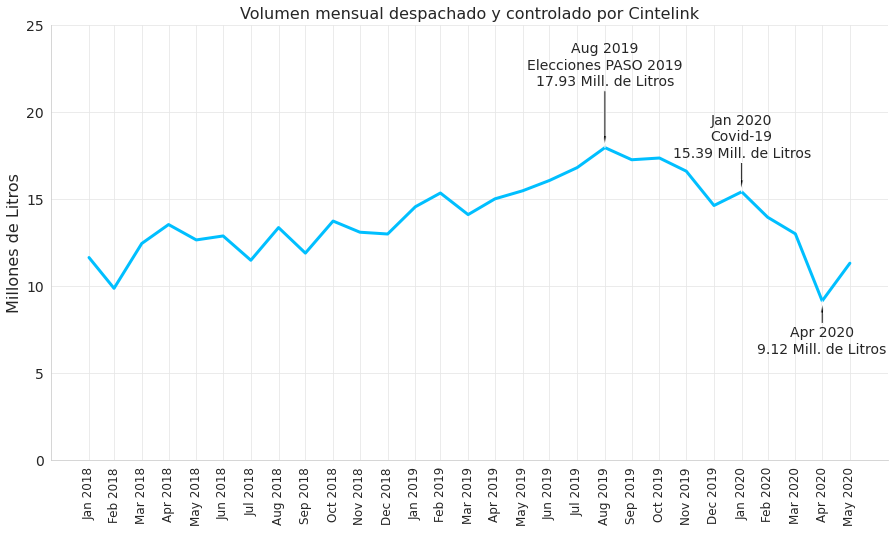

In [7]:
# sp2.set_title("Cantidad de litros despachados")
#ax=sns.distplot(dfgroupby_equipo['cantidad'],kde=False, norm_hist=False, label='volumen suministrado[Lts]')
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo

# with sns.axes_style("whitegrid"):
sns.set_style("whitegrid", {"grid.color": ".9"})
ax1 = sns.lineplot(x=df['fecha_hora'],y=df['cantidad']/1e6, linewidth=3, color='deepskyblue')
#plt.scatter(xm,ym, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)
#plt.scatter(xm_covid, ym_covid, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)
#plt.scatter(xmm,ymm, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)

ym = df['cantidad'].max()/1e6
xm = df['fecha_hora'][df['cantidad'].idxmax()]
ymm = df['cantidad'].min()/1e6
xmm = df['fecha_hora'][df['cantidad'].idxmin()]
xm_covid = pd.to_datetime('2020-01-31')
ym_covid = df.iloc[df.set_index('fecha_hora').index.get_loc(xm_covid, method='nearest')]['cantidad']/1e6

# Max
plt.annotate('{}\nElecciones PASO 2019\n{:.2f} Mill. de Litros'.format(xm.strftime("%b %Y"), ym), 
             xy=(xm,ym), 
             xytext=(xm, ym*1.2), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))

plt.annotate('{}\nCovid-19\n{:.2f} Mill. de Litros'.format(xm_covid.strftime("%b %Y"), ym_covid), 
             xy=(xm_covid, ym_covid), 
             xytext=(xm_covid, ym_covid+2), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
# Min
plt.annotate('{}\n{:.2f} Mill. de Litros'.format(xmm.strftime("%b %Y"), ymm), 
             xy=(xmm,ymm), 
             xytext=(xmm, ymm-3), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
#bbox_props = dict(
#    boxstyle="rarrow,pad=0.5", 
#    fc="cyan", ec="b", lw=1
#)
#plt.text(xm, ym-2, "Politics & Covid Effect", 
#            ha="left", va="top", 
#            rotation=-35,
#            size=15,
#            bbox=bbox_props)
# ax1.annotate('local max', xy=(3, 1),  xycoords='data',
#             xytext=(0.8, 0.95), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',
#             )
plt.ylabel('Millones de Litros',fontsize=16)
plt.xlabel('')
plt.title("Volumen mensual despachado y controlado por Cintelink",fontsize=16)
plt.ylim(0,25)
# ax.set_yscale('log')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(df['fecha_hora'],fontsize=12, rotation='90')
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()
plt.show()
# fig.savefig('report_volumen.pdf')

In [8]:
dfgroupby_equipo

,fecha_hora,cantidad,main_id,id_bomba
0,2018-01-31,11614325.0,1693,225
1,2018-02-28,9843366.0,1713,244
2,2018-03-31,12419908.0,1796,259
3,2018-04-30,13509366.0,1821,250
4,2018-05-31,12625420.0,1840,258
5,2018-06-30,12853634.0,1822,260
6,2018-07-31,11457641.0,1790,257
7,2018-08-31,13335265.0,1832,279
8,2018-09-30,11868222.0,1869,307
9,2018-10-31,13710560.0,2011,311


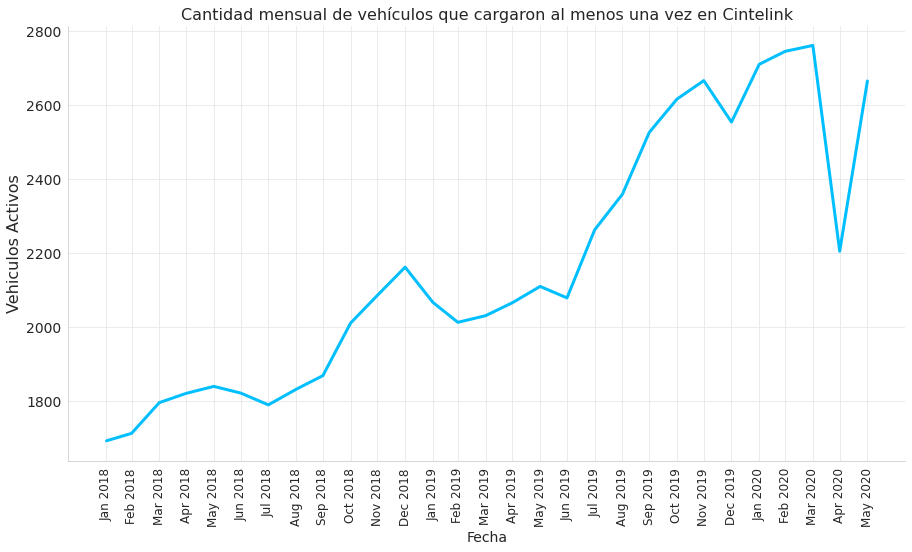

In [9]:
df = dfgroupby_equipo

fig = plt.figure(figsize=(15,8))

ax1 = sns.lineplot(x=df['fecha_hora'],y=df['main_id'], linewidth=3, color='deepskyblue')

plt.ylabel('Vehiculos Activos',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de vehículos que cargaron al menos una vez en Cintelink",fontsize=16)
#plt.ylim(4,8)
# ax.set_yscale('log')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(df['fecha_hora'],fontsize=12, rotation='90')
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()



plt.show()

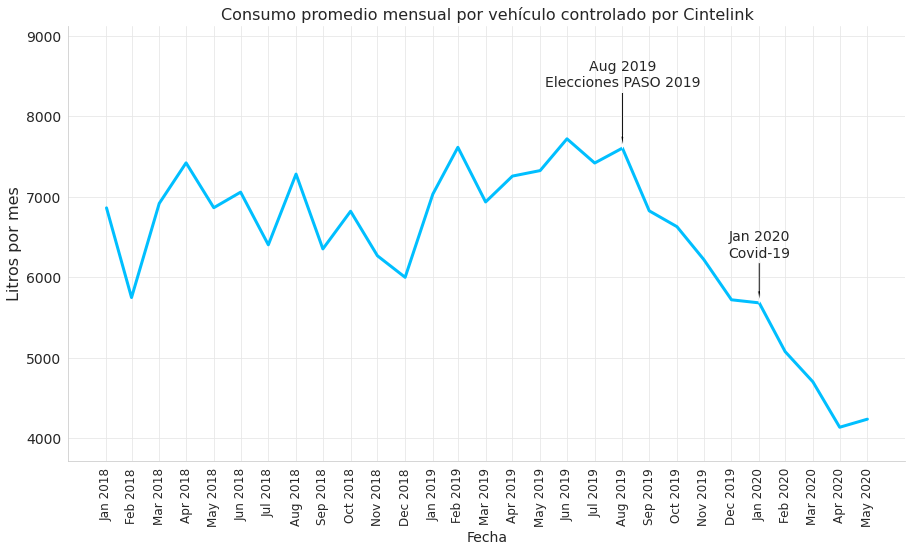

In [11]:
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo[dfgroupby_equipo['fecha_hora']>'2019-08-01']

y = df['cantidad']/df['main_id']

ax1=sns.lineplot(x=dfgroupby_equipo['fecha_hora'],
                y=dfgroupby_equipo['cantidad']/dfgroupby_equipo['main_id'], linewidth=3, color='deepskyblue')

ym = y.max()
ymim = y.min()
xm = df['fecha_hora'][y.idxmax()]

xm_covid = pd.to_datetime('2020-01-31')

ym_covid = y.iloc[df.set_index('fecha_hora').index.get_loc(xm_covid, method='nearest')]

# Max
plt.annotate('{}\nElecciones PASO 2019'.format(xm.strftime("%b %Y")), 
             xy=(xm,ym), 
             xytext=(xm, ym*1.1), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))

plt.annotate('{}\nCovid-19'.format(xm_covid.strftime("%b %Y")), 
             xy=(xm_covid, ym_covid), 
             xytext=(xm_covid, ym_covid*1.1), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
# Min
# plt.annotate('{}\n{:.2f} Mill. de Litros'.format(xmm.strftime("%b %Y"), ymm), 
#              xy=(xmm,ymm), 
#              xytext=(xmm, ymm-3), 
#              fontsize=14,
#              ha='center',
#              arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))


plt.ylabel('Litros por mes',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Consumo promedio mensual por vehículo controlado por Cintelink",fontsize=16)
plt.ylim(ymim*0.9,ym*1.2)
# ax.set_yscale('log')
plt.xticks(dfgroupby_equipo['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()



plt.show()

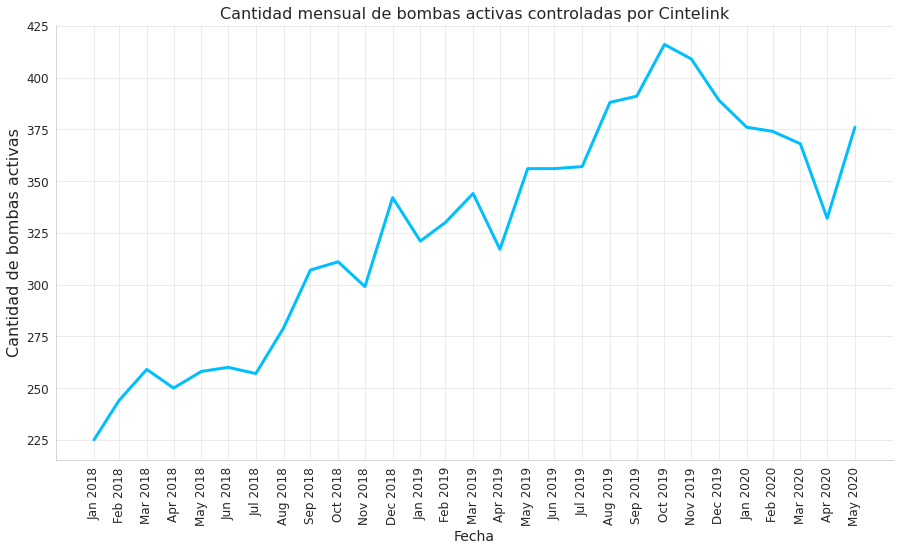

In [12]:
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo
ax1=sns.lineplot(x=df['fecha_hora'],y=df['id_bomba'], linewidth=3, color='deepskyblue')

plt.ylabel('Cantidad de bombas activas',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de bombas activas controladas por Cintelink",fontsize=16)
# plt.ylim(4,8)
# ax.set_yscale('log')
plt.xticks(df['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()

## ANALISIS DE HISTORIAL DE TANQUES

In [13]:
#df_historial = pd.read_csv('../dataset/data_csv/historial_tanques_ultra_light.zip', parse_dates=['fecha_hora'], compression='zip')
df_historial =  pd.read_pickle('dataframe_historial.pkl.zip')
df_historial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38667841 entries, 0 to 4856406
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                uint32        
 1   id_equipo         uint32        
 2   id_tanque         uint32        
 3   fecha_hora        datetime64[ns]
 4   volumen           float32       
 5   temperatura       float32       
 6   codigo            object        
 7   baja              bool          
 8   fuel_level_dmm    float64       
 9   water_level_dmm   float64       
 10  water_volume_lts  float32       
 11  producto          float64       
 12  geo_latitude      float32       
 13  geo_longitude     float32       
 14  temp5             float32       
 15  temp4             float32       
 16  temp3             float32       
 17  temp2             float32       
 18  temp1             float32       
dtypes: bool(1), datetime64[ns](1), float32(10), float64(3), object(1), uint32(3)
memory

In [14]:
dfgroupby_historial = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = pd.Grouper(key="fecha_hora", freq="M")

dfgroupby_historial['id_tanque'] = df_historial.groupby(grupo)['id_tanque'].nunique()
dfgroupby_historial['volumen'] = df_historial.groupby(grupo)['volumen'].mean()
dfgroupby_historial.reset_index(inplace=True)

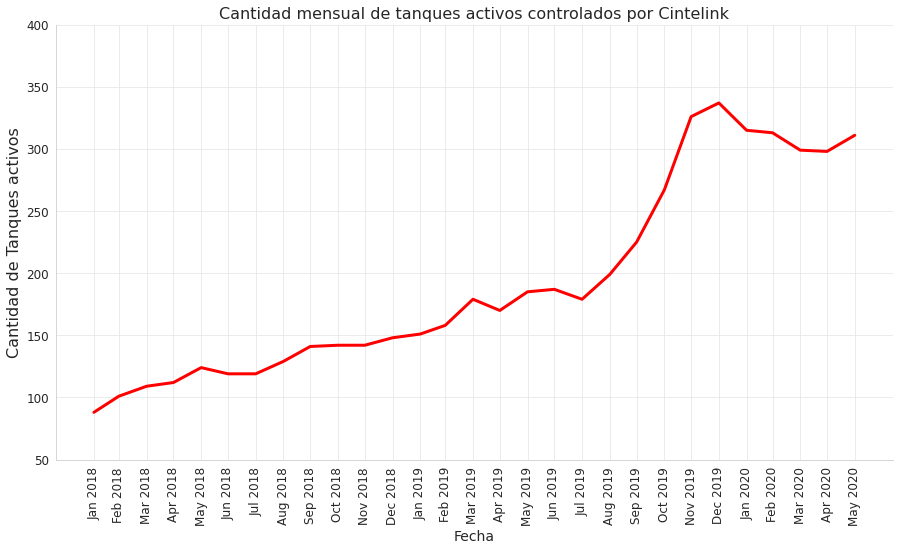

In [15]:
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(x=dfgroupby_historial['fecha_hora'],y=dfgroupby_historial['id_tanque'], linewidth=3, color='Red')

plt.ylabel('Cantidad de Tanques activos',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de tanques activos controlados por Cintelink",fontsize=16)
plt.ylim(50,400)
# ax.set_yscale('log')
plt.xticks(dfgroupby_historial['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()

In [17]:
fs_tanque = pd.read_pickle('dataframe_tanques.pkl.zip')
fs_tanque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_tanque     1561 non-null   int32  
 1   id_equipo     1561 non-null   int16  
 2   tanque        1561 non-null   object 
 3   producto      1561 non-null   object 
 4   capacidad     1560 non-null   float32
 5   log_interval  1560 non-null   float32
 6   nivel_alarma  1561 non-null   float32
dtypes: float32(3), int16(1), int32(1), object(2)
memory usage: 52.0+ KB


In [6]:
dfgroupby_tanques = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = [pd.Grouper(key="fecha_hora", freq="M"),'id_tanque']

# dfgroupby_tanques['id_tanque'] = df_historiales.groupby(grupo)['id_tanque'].nunique()
dfgroupby_tanques['volumen'] = df_historial.groupby(grupo)['volumen'].mean()

In [7]:
index=fs_tanque.set_index('id_tanque').index.get_indexer(dfgroupby_tanques.reset_index('fecha_hora').index)

In [8]:
dfgroupby_tanques['capacidad']=fs_tanque.iloc[index]['capacidad'].values

In [9]:
dfgroupby_tanques['capacidad']=dfgroupby_tanques['capacidad'].astype('float')

In [10]:
grupo = pd.Grouper(key="fecha_hora", freq="M")
dfgroupby_capacidades=pd.DataFrame()
dfgroupby_capacidades['capacidad']=dfgroupby_tanques.reset_index().groupby(grupo)['capacidad'].sum()
dfgroupby_capacidades.reset_index(inplace=True)

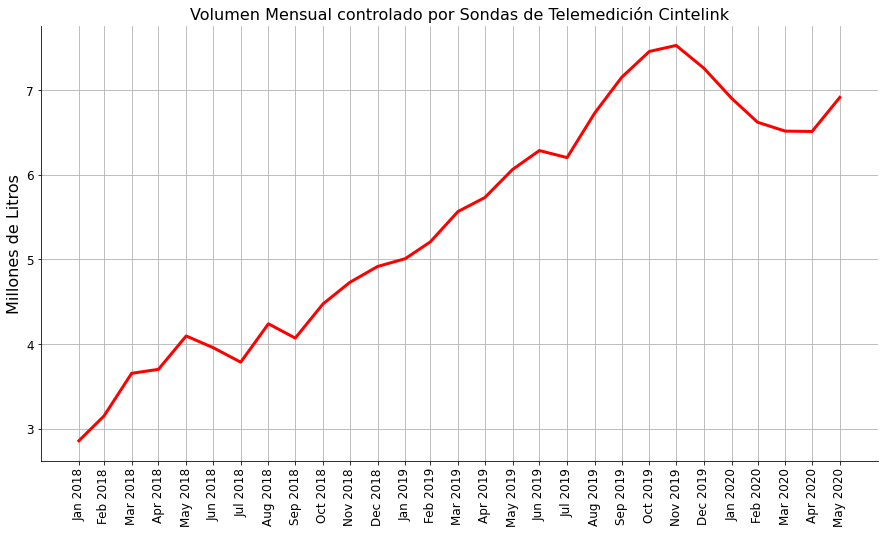

In [11]:
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(x=dfgroupby_capacidades['fecha_hora'],y=dfgroupby_capacidades['capacidad']/1e6, linewidth=3, color='Red')

plt.ylabel('Millones de Litros',fontsize=16)
plt.xlabel('',fontsize=14)
plt.title("Volumen Mensual controlado por Sondas de Telemedición Cintelink",fontsize=16)
# plt.ylim(50,400)
# ax.set_yscale('log')
plt.xticks(dfgroupby_historial['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()